In [2]:
%load_ext autoreload
import glob
import sys
import os
import time
import argparse
import collections
from types import SimpleNamespace
import random

import matplotlib.pyplot as plt
import numpy as np
# import cairo
from PIL import Image, ImageDraw, ImageFont, ImageFilter

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import torchvision.transforms as transforms
# from torchsummary import summary

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


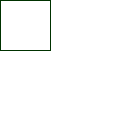

In [26]:
im = Image.new("RGBA", (imsize, imsize))
draw = ImageDraw.Draw(im)
draw.polygon([(0,0), (0,50), (50,50), (50,0)], outline=(0, 50, 0))
im

len(contours) 13
(26, 1, 2)
[[17 69]
 [16 67]
 [31 58]
 [32 60]]


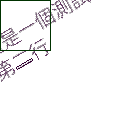

In [40]:
import cv2

imsize = 128
font = ImageFont.truetype("/workspace/post-generator/asset/fonts_cn/GenJyuuGothic/GenJyuuGothic-Light.ttf", 20, encoding='unic')
im = Image.new("RGBA", (imsize, imsize))
draw = ImageDraw.Draw(im)
draw.text((0,0), "這是一個測試\n第二行", (100, 50, 100), font)
_im = im.rotate(30)

im = np.array(_im).copy()
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# cv2.threshold(im,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU, im)
im, contours, hierarchy = cv2.findContours(im, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 100]
print('len(contours)', len(contours))
cnt = contours[0]

print(cnt.shape)

rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
print(box)
im = cv2.drawContours(im, [box], 0, (0, 0, 255), 2)

# im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
# Image.fromarray(im)

# cv2.imshow('fd', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


# im = im[:, :, ::-1].copy()  # RGB to BGR 
# im

# print(type(box))
box = [tuple(x) for x in box]
draw = ImageDraw.Draw(_im)
draw.polygon(box, outline=(50, 0, 50))
draw.polygon([(0,0), (0,50), (50,50), (50,0)], outline=(0, 50, 0))
_im

[(0, (24.4453125, 48.88671875)), (1, (24.6484375, 48.8984375)), (1, (24.2421875, 48.8984375)), (3, ()), (0, (24.2421875, 48.8984375)), (1, (24.6484375, 48.8984375)), (1, (24.85546875, 48.92578125)), (1, (24.03515625, 48.92578125)), (3, ()), (0, (24.03515625, 48.92578125)), (1, (24.85546875, 48.92578125)), (1, (25.0546875, 48.97265625)), (1, (23.8359375, 48.97265625)), (3, ()), (0, (23.8359375, 48.97265625)), (1, (25.0546875, 48.97265625)), (1, (25.25, 49.0390625)), (1, (23.640625, 49.0390625)), (3, ()), (0, (23.640625, 49.0390625)), (1, (25.25, 49.0390625)), (1, (25.4375, 49.12109375)), (1, (23.453125, 49.12109375)), (3, ()), (0, (23.453125, 49.12109375)), (1, (25.4375, 49.12109375)), (1, (25.61328125, 49.21875)), (1, (23.27734375, 49.21875)), (3, ()), (0, (23.27734375, 49.21875)), (1, (25.61328125, 49.21875)), (1, (25.78515625, 49.3359375)), (1, (23.10546875, 49.3359375)), (3, ()), (0, (23.10546875, 49.3359375)), (1, (25.78515625, 49.3359375)), (1, (25.94140625, 49.46875)), (1, (22.94

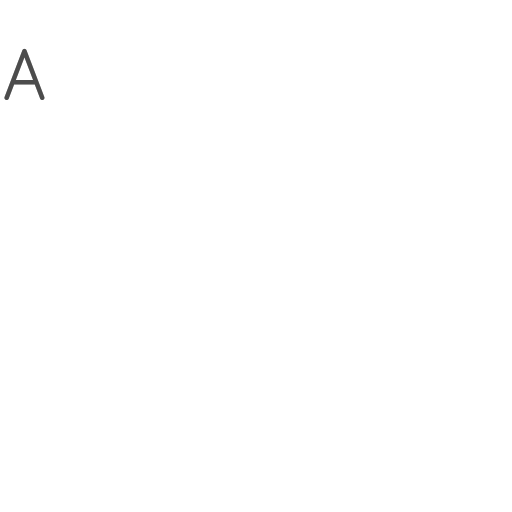

In [18]:
import cairo
import math

def warpPath(ctx, function):
    first = True

    for type, points in ctx.copy_path():
        if type == cairo.PATH_MOVE_TO:
            if first:
                ctx.new_path()
                first = False
            x, y = function(*points)
            ctx.move_to(x, y)

        elif type == cairo.PATH_LINE_TO:
            x, y = function(*points)
            ctx.line_to(x, y)

        elif type == cairo.PATH_CURVE_TO:
            x1, y1, x2, y2, x3, y3 = points
            x1, y1 = function(x1, y1)
            x2, y2 = function(x2, y2)
            x3, y3 = function(x3, y3)
            ctx.curve_to(x1, y1, x2, y2, x3, y3)

        elif type == cairo.PATH_CLOSE_PATH:
            ctx.close_path()

def spiral(x, y):
    theta0 = -math.pi * 3 / 4
    theta = x / Width * math.pi * 2 + theta0
    radius = y + 200 - x/7
    xnew = radius*math.cos(theta)
    ynew = radius*math.sin(-theta)
    return xnew + Width/2, ynew + Height/2

def curl(x, y):
    xn = x - Textwidth/2
    #yn = y - Textheight/2
    xnew = xn
    ynew = y + xn ** 3 / ((Textwidth/2)**3) * 70
    return xnew + Width/2, ynew + Height*2/5


Width, Height = 512, 512
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, Width, Height)
ctx = cairo.Context(surface)
solidpattern = ctx.get_source()

# background
# pat = cairo.LinearGradient (0.0, 0.0, 0, Height)
# pat.add_color_stop_rgba (1, 0, 0, 0, 1)
# pat.add_color_stop_rgba (0, 1, 1, 1, 1)

# ctx.rectangle (0,0,Width,Height)
# ctx.set_source (pat)
# ctx.fill ()

# foreground
ctx.set_source (solidpattern)
ctx.set_source_rgb (1,1,1)

ctx.select_font_face("Sans")
ctx.set_font_size(80)

# spiral text
# ctx.new_path()
# ctx.move_to(0, 0)
# ctx.text_path("pycairo - " + "spam " * 5)
# warpPath(ctx, spiral)
# ctx.fill()

# curly text
ctx.new_path()
ctx.move_to(0, 100)
ctx.set_source_rgb(0.3, 0.3, 0.3)
text = "A"
ctx.text_path(text)
Textwidth, Textheight = ctx.text_extents(text)[2:4]
# warpPath(ctx, curl)

print([(type, points) for type, points in ctx.copy_path()])

ctx.fill()

data = np.ndarray(
    shape=(512, 512, 4), dtype=np.uint8, buffer=surface.get_data()
)
im = Image.fromarray(data)
im



In [52]:
from faker import Faker
from collections import OrderedDict

WORDS_TC = '日一國會人年大十二本中長出三同時政事自行社見月分議後前民生連五発間対上部東者黨地合市業內相方四定今回新場金員九入選立開手米力學問高代明実円関決子動京全目表戦経通外最言氏現理調體化田當八六約主題下首意法不來作性的要用制治度務強気小七成期公持野協取都和統以機平総加山思家話世受區領多県続進正安設保改數記院女初北午指権心界支第産結百派點教報済書府活原先共得解名交資予川向際査勝面委告軍文反元重近千考判認畫海參売利組知案道信策集在件団別物側任引使求所次水半品昨論計死官増係感特情投示変打男基私各始島直両朝革価式確村提運終挙果西勢減台広容必応演電歳住爭談能無再位置企真流格有疑口過局少放稅検藤町常校料沢裁狀工建語球営空職証土與急止送援供可役構木割聞身費付施切由説転食比難防補車優夫研収斷井何南石足違消境神番規術護展態導鮮備宅害配副算視條幹獨警宮究育席輸訪楽起萬著乗店述殘想線率病農州武聲質念待試族象銀域助労例衛然早張映限親額監環験追審商葉義伝働形景落歐擔好退準賞訴辺造英被株頭技低毎醫復仕去姿味負閣韓渡失移差衆個門寫評課末守若脳極種美岡影命含福蔵量望松非撃佐核観察整段橫融型白深字答夜製票況音申様財港識註呼渉達'
WORDS_SC = '日一国会人年大十二本中长出三同时政事自行社见月分议后前民生连五発间対上部东者党地合市业内相方四定今回新场金员九入选立开手米力学问高代明実円関决子动京全目表戦経通外最言氏现理调体化田当八六约主题下首意法不来作性的要用制治度务强気小七成期公持野协取都和统以机平総加山思家话世受区领多県続进正安设保改数记院女初北午指権心界支第産结百派点教报済书府活原先共得解名交资予川向际査胜面委告军文反元重近千考判认画海参売利组知案道信策集在件団别物侧任引使求所次水半品昨论计死官増係感特情投示変打男基私各始岛直両朝革価式确村提运终挙果西势减台広容必応演电歳住争谈能无再位置企真流格有疑口过局少放税検藤町常校料沢裁状工建语球営空职証土与急止送援供可役构木割闻身费付施切由説転食比难防补车优夫研収断井何南石足违消境神番规术护展态导鲜备宅害配副算视条干独警宫究育席输访楽起万着乗店述残想线率病农州武声质念待试族象银域助労例卫然早张映限亲额监环験追审商叶义伝働形景落欧担好退准赏诉辺造英被株头技低毎医復仕去姿味负阁韩渡失移差衆个门写评课末守若脳极种美冈影命含福蔵量望松非撃佐核観察整段横融型白深字答夜製票况音申様财港识注呼渉达'

ws = []
for (a, b) in zip(WORDS_TC, WORDS_SC):
    if a == b:
        ws.append(a)

# fake = Faker(OrderedDict([
#     ('zh_CN', 2),
# ]))

''.join(random.sample(ws, 10))


# fake["zh_CN"].text(15, )[:-1]
# fake["zh_CN"].text(15, ws)


'信心企住共率首述府様'

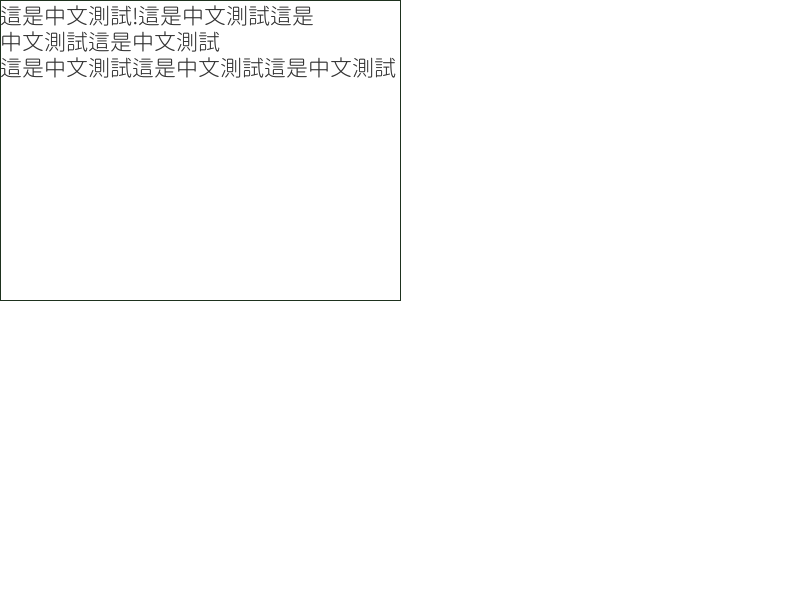

In [279]:
from blocks.utils import ImageText

color = (50, 50, 50)
text = 'Python is a cool programming language. You should learn it!'
text = '這是中文測試!這是中文測試這是\n中文測試這是中文測試\n這是中文測試這是中文測試這是中文測試'
font = '/workspace/post-generator/asset/fonts_en/Shrikhand/Shrikhand-Regular.ttf'
font = "/workspace/post-generator/asset/fonts_cn/GenJyuuGothic/GenJyuuGothic-Light.ttf"
img = ImageText((800, 600)) # 200 = alpha

#write_text_box will split the text in many lines, based on box_width
#`place` can be 'left' (default), 'right', 'center' or 'justify'
#write_text_box will return (box_width, box_calculed_height) so you can
#know the size of the wrote text
# img.write_text_box((300, 50), text, box_width=200, font_filename=font,
#                    font_size=15, color=color)
# img.write_text_box((300, 125), text, box_width=200, font_filename=font,
#                    font_size=15, color=color, place='right')
# img.write_text_box((300, 200), text, box_width=200, font_filename=font,
#                    font_size=15, color=color, place='center')
img.fill_text_box((0, 0), text, box_width=400, box_height=300, font_filename=font,
                   color=color)
# img.write_text_box((300, 275), text, box_width=200, font_filename=font,
#                    font_size=15, color=color, place='justify')

#You don't need to specify text size: can specify max_width or max_height
# and tell write_text to fill the text in this space, so it'll compute font
# size automatically
#write_text will return (width, height) of the wrote text
# img.write_text((100, 350), '中文測試', font_filename=font,
#                font_size='fill', max_width=150, max_height=150, color=color)

# img.save('sample-imagetext.png')
img.image
img.draw.rectangle((0, 0, 400, 300), fill=None, outline=(30, 50, 30))
img.image

/workspace/CRAFT-pytorch/mysrc/generator


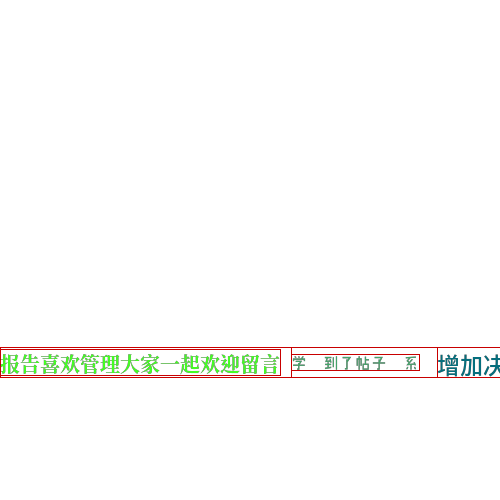

In [490]:
%cd /workspace/CRAFT-pytorch/mysrc/generator
%autoreload 2

from blocks.text import _Box, fonts_en, fonts_cn, fake, _FixedBox
from blocks.layout import rand_box 

root = rand_box(np.array([400, 100])).clone(_Box, fonts_cn, 1)
im, infos = root.sample(500)
im

# b = _FixedBox(fonts_en, np.zeros(2), np.array([256, 128]))
# im, infos = b.sample(356)
# im

# for b in root.leafs():
#     b = _FixedBox(fonts_en, np.zeros(2), np.array([256, 128]))

/workspace/CRAFT-pytorch/my-src/generator
[{'ann': <PIL.Image.Image image mode=RGBA size=256x256 at 0x7FE8E173EDA0>, 'cat': 'Photo_Rect', 'bbox': (68, 128, 87, 153), 'param': {'_wh': array([0.07421875, 0.09765625], dtype=float32), '_cxy': array([0.30273438, 0.5488281 ], dtype=float32), 'i_sample': 57, 'wh': (133, 77), 'cxy': (206, 127), 'bbox': (68, 128, 87, 153), '_xy': array([0.13921242, 0.57754971]), 'xy': (35, 147)}, 'bks': None}, {'ann': <PIL.Image.Image image mode=RGBA size=256x256 at 0x7FE8E1684080>, 'cat': 'Photo_Rect', 'bbox': (87, 128, 106, 153), 'param': {'_wh': array([0.07421875, 0.09765625], dtype=float32), '_cxy': array([0.37695312, 0.5488281 ], dtype=float32), 'i_sample': 116, 'wh': (156, 174), 'cxy': (93, 114), 'bbox': (87, 128, 106, 153), '_xy': array([0.02687279, 0.04113275]), 'xy': (6, 10)}, 'bks': None}, {'ann': <PIL.Image.Image image mode=RGBA size=256x256 at 0x7FE8E1684160>, 'cat': 'Photo_Rect', 'bbox': (107, 128, 146, 153), 'param': {'_wh': array([0.15234375, 0.0

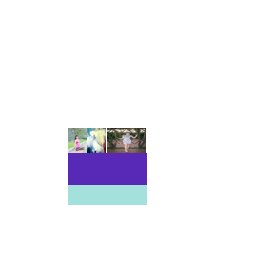

In [606]:
%cd /workspace/CRAFT-pytorch/mysrc/generator
%autoreload 2

import blocks as bk

bx = bk.BoxLayoutGroup([bk.Photo("/workspace/CRAFT-pytorch/data/crawled_fb/model/*.jpg", cat="Photo_Rect"), bk.Rect()])
ims, infos = bx.sample(256)
print(infos)

im = Image.new("RGBA", (256, 256))
for _im in ims:
    im.alpha_composite(_im)
im

# ims[0]
# from blocks.layout import rand_box

# b = rand_box(np.array([100, 100], dtype=np.int32))
# b.xy = np.zeros(2)
# b.set_xy()
# print(b)

# imsize = 200
# im = Image.new("RGBA", (imsize, imsize))
# draw = ImageDraw.Draw(im)
# def _draw(b):
#     bbox = np.concatenate([b.xy, b.xy+b.wh])
# #     print(bbox)
#     draw.rectangle(tuple(bbox), fill=None, outline=(255, 100, 0))
#     for c in b.children:
#         _draw(c)
# _draw(b)
# im

/workspace/CRAFT-pytorch/my-src/generator
[288  54]


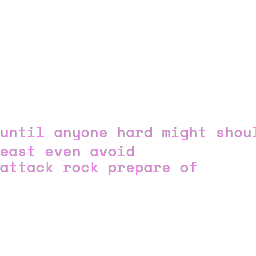

In [1201]:
%cd /workspace/CRAFT-pytorch/my-src/generator
%autoreload 2
from blocks import text as bk

# def to_box(text, lang):
#     b = _Box(self.fonts[lang])
#     for t in text:
#         if isinstance(t, list):
#             b.insert(to_box(t, lang))
#         elif isinstance(t, str):
#             b.insert(_Text(t, lang, self.fonts[lang]))
#         else:
#             raise Exception("Unknown type")
#     return b

# lambda opt(choices): lambda: random.choice(choices)
# p = choice(params)


_ln = lambda: bk._Text(" ".join(fake["en-US"].words(np.random.randint(3, 8))), 0, bk.fonts_en)
_wd = lambda: bk._Text(" ".join(fake["en-US"].words(np.random.randint(1, 4))), 0, bk.fonts_en)

class EmptyBoxError(Exception):
    pass

class Opt:
    def __init__(self, choices=[]):
        self.choices = choices
    
    def one(self):
        e = random.choice(self.choices)
        if e is None:
            return None
        if callable(e):
            return e()
        if isinstance(e, Opt):
            return e.one()
        if isinstance(e, tuple):
            return self._tobox(e)
            
    def _tobox(self, e):
        p, children = e
        b = bk._Box(bk.fonts_en, p)
        for c in children:
            if isinstance(c, tuple):
                c = self._tobox(c)
            elif callable(c):
                c = c()
            elif isinstance(c, Opt):
                c = c.one()
            else:
                raise Exception
            
            if c is not None:
                b.insert(c)
        
        if len(b.children) == 0:
            raise EmptyBoxError
        elif len(b.children) == 1 and isinstance(b.children[0], bk._Box):
            return b[0]
        else:
            return b

kw = Opt([
    ({"i_align": 0}, [_wd, ({"i_align": 0}, [_wd]), _wd]),
#     (0, [_ln, [_wd]]),
#     (0, [[_wd], _ln]),
])

hln = Opt([None, None, _ln, _ln, kw])
# hln = Opt([kw])
mln = Opt([
    ({"i_align": 1, "dapart": 0}, [hln, hln, hln, hln, hln]),
#     (HOR, [vln, vln, hln, hln, hln]),
])


b = mln.one()
im, infos = b.sample(256)
im
# wd = (HOR, [wd])
# mwd = op([
#     (HOR, [wd, wd, wd, wd, wd]), 
#     (VER, [wd, wd, wd, wd, wd]), 
#     ])

# " ".join(fake["en-US"].words(np.random.randint(3, 8)))
# ln = bk._Text("thi is a line", 0, [])
# im


In [548]:
from faker import Faker
import random

fake = Faker()

n = np.random.randint(1, 6)
parts = [" ".join(fake.words(np.random.randint(1, 6))) for _ in range(np.random.randint(1, 5))]

for i, p in enumerate(parts):
    if random.random() < 0.2:
        if random.random() < 0.5:
            parts[i] = p.split(" ")
        else:
            parts[i] = [p]            
parts



['quite country information international and',
 'how mother policy',
 ['mean', 'seem', 'author'],
 ['partner']]

In [670]:
from faker import Faker

# 主標題：分詞/字、排列特殊、方塊形組合
# 副標題：一行字
# 本文：多行字



def rand_text(fake: Faker, lang: int):
    parts = ["".join(fake.words(np.random.randint(1, 6)))
             for _ in range(np.random.randint(1, 5))]
    for i, p in enumerate(parts):
        if random.random() < 0.2:
            if random.random() < 0.5:
#                 parts[i] = p.split()
                parts[i] = list(p)
            else:
                parts[i] = [p]
    return parts

fake = Faker(OrderedDict([
    ('en-US', 1),
    ('zh_CN', 2),
    ('zh_TW', 3),
]))
rand_text(fake["zh_CN"], 0)

['城市作为同时', '软件说明', ['原', '因', '品', '牌', '上', '海']]

/workspace/CRAFT-pytorch/my-src/generator
[['方面 开发 产品 发布 质量'], '实现 以及 学生', '合作 根据 只是', '活动']
[580  37]


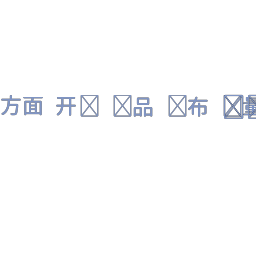

In [614]:
%cd /workspace/CRAFT-pytorch/my-src/generator
%autoreload 2
from blocks import text as bk

t = bk.Textbox()
im, infos = t.sample(256)
im

# def to_box(tks, fonts):
#     b = bk._Box(fonts)
#     for t in tks:
#         if isinstance(t, list):
#             b.insert(to_box(t, fonts))
#         elif isinstance(t, str):
#             b.insert(bk._Text(t, fonts))
#         else:
#             raise Exception("unhandled type")
#     return b


# b = to_box(parts, bk.en_fonts)
# b = to_box(["this is ", ["a "], "test. "], bk.en_fonts)
# b = to_box(list("這是一個測試"), bk.cn_fonts)
# print(b.children)


# t = bk.TextBox()
# t.sample(128)
# b = bk._Box()
# b2 = bk._Box()
# b2.insert(bk._Text("ccc"))

# b.insert(bk._Text("aaa"))
# b.insert(bk._Text("bbb"))
# b.insert(b2)

# print(b.children)
# im, infos = b.sample(256)
# # im
# print(infos)

# print(infos[0]["bbox"])
# infos[0]["ann"]
# infos

In [54]:
%autoreload 2

class Node:
    def __init__(self):
        self.parent = None
        self.children = []
    
    def add(self, node: "Node"):
        self.children.append(node)
        
class Prop(Node):
    def __init__(self):
        super().__init__()
        self.textsize = None
#         self.cont = cont
    
    def sample(self, parent=None):
        if parent is not None:
            self.textsize = parent.textsize + np.random.randint(-1, 2)
        else:
            self.textsize = np.random.randint(5, 15)

        for c in self.children:
            c.sample(self)
        
class Token():
    def __init__(self, i: int, t: str):
        self.i = i
        self.t = t
        self.prop = None
        
    def __repr__(self):
        return str((self.i, self.t, self.prop.textsize))
    
text = "aaa bbb ccc ddd"
tokens = [Token(i, t) for i, t in enumerate(text.split(" "))] 

root = Prop()
c1 = Prop()
root.add(c1)
root.sample()

tokens[0].prop = root
tokens[3].prop = root
tokens[1].prop = c1
tokens[2].prop = c1

print(tokens)

[(0, 'aaa', 8), (1, 'bbb', 9), (2, 'ccc', 9), (3, 'ddd', 8)]


In [11]:
def _cat_hor(photos):
    min_h = min(p.param["wh"][1] for p in photos)
    cx, cy = photos[0].param["cxy"]
    dx = 0
    for p in photos:
        w, h = p.param["wh"]
        p.param["wh"] = (w * min_h / h, min_h)
        p.param["cxy"] = (cx + dx, cy)
        dx += p.param["wh"][0]

photos = [(10, 30), (20, 40), (30, 50)]
        
def _cat_hor(photos):
    min_h = min(p[1] for p in photos)
#     cx, cy = photos[0].param["cxy"]
    dx = 0
    for p in photos:
        w, h = p
        print(w * min_h / h, min_h)
#         p.param["cxy"] = (cx + dx, cy)
#         dx += p.param["wh"][0]
        
_cat_hor(photos)

10.0 30
15.0 30
18.0 30


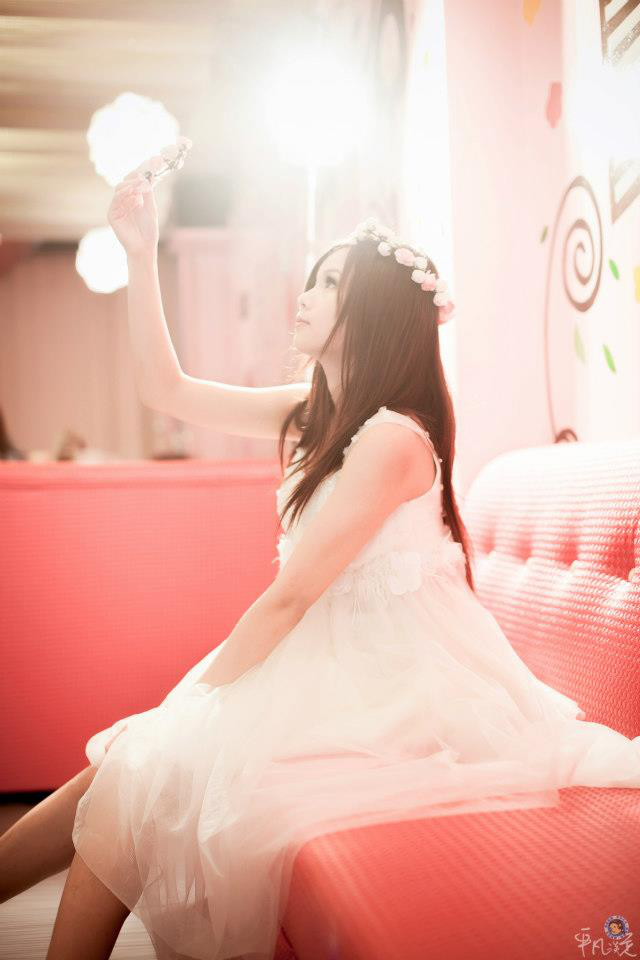

In [7]:
im = Image.open("/workspace/CoordConv-pytorch/data/facebook/60122_528371913855789_1929735771_n.jpg")
im.resize((100, 300), 3)
im

In [28]:
%autoreload 2
%cd /workspace/CRAFT-pytorch/my-src/generator

import copy
import blocks as bk

pg = bk.PhotoGroup(bk.Photo("/workspace/CoordConv-pytorch/data/facebook", cat="Photo_Rect"))
pg.sample(512)

/workspace/CRAFT-pytorch/my-src/generator
203
<PIL.Image.Image image mode=RGBA size=512x512 at 0x7F5734643B38> (302, 15, 354, 93)
<PIL.Image.Image image mode=RGBA size=512x512 at 0x7F57346431D0> (228, 0, 512, 156)
<PIL.Image.Image image mode=RGBA size=512x512 at 0x7F57346FA630> None


([<PIL.Image.Image image mode=RGBA size=512x512 at 0x7F5734643B38>,
  <PIL.Image.Image image mode=RGBA size=512x512 at 0x7F57346431D0>],
 [{'ann': <PIL.Image.Image image mode=RGBA size=512x512 at 0x7F5734643B38>,
   'cat': 'Photo_Rect',
   'bbox': (302, 15, 354, 93),
   'param': {'_wh': array([0.1015625 , 0.15234375], dtype=float32),
    '_cxy': array([0.640625  , 0.10546875], dtype=float32),
    'i_sample': 14,
    'wh': (52.530701754385966, 203),
    'cxy': (328, 54),
    'bbox': (302, 15, 354, 93),
    'repeat': False},
   'bks': None},
  {'ann': <PIL.Image.Image image mode=RGBA size=512x512 at 0x7F57346431D0>,
   'cat': 'Photo_Rect',
   'bbox': (228, 0, 512, 156),
   'param': {'_wh': array([0.5546875, 0.3046875], dtype=float32),
    '_cxy': array([0.72265625, 0.15234375], dtype=float32),
    'i_sample': 2,
    'wh': (384.0, 203),
    'cxy': (380.530701754386, 54),
    'bbox': (228, 0, 512, 156),
    'repeat': False},
   'bks': None}])

In [5]:
class Edge:
    corner_id = {
        0: {"a0": 2,"a1": 3,"b0": 1,"b1":0},
        1: {"a0": 3,"a1": 0,"b0": 2,"b1":1},
        2: {"a0": 1,"a1": 0,"b0": 2,"b1":3},
        3: {"a0": 2,"a1": 1,"b0": 3,"b1":0}
    }
    
    def __init__(self, id: int, a, b):
        a = np.array(a)
        b = np.array(b)
        self.id = id
        self.ps = np.stack((a, b)) if np.sum(a - b) < 0 else np.stack((b, a))
#         self.corners = []
#         self.segs = [Edge(i, ps)]

    def incude(self, p: np.ndarray):
        h = self.a[0] == self.b[0] == p[0] and self.a[1] <= p[1] <= self.b[1]
        v = self.a[1] == self.b[1] == p[1] and self.a[0] <= p[0] <= self.b[0]
        return h or v

    def cut(self, e):
        segs, corners = [], []
        
        if abs(self.id - e.id) != 2:
            return segs, corners
        
        i, j = 0, 1 if self.id % 2 == 0 else (1, 0)  # use x or y
        if self.ps[0, i] == e.ps[0, i] and self.ps[1, i] == e.ps[1, i]:
            if self.ps[0, j] < e.ps[0, j] < self.ps[1, j]:
                segs.append(np.stack([self.ps[0], e.ps[0]]))
                corners.append(e.ps[0])
            if self.ps[0, j] < e.ps[1, j] < self.ps[1, j]:
                segs.append(np.stack([e.ps[1], self.ps[1]]))
                corners.append(e.ps[1])    

        return segs, corners
    
    def corners(self, a):
        corners = []
        
        if abs(self.id - a.id) != 2:
            return corners
        
        i, j = 0, 1 if self.id % 2 == 0 else (1, 0)  # use x or y
        
        if self.ps[0, i] == a.ps[0, i] and self.ps[1, i] == a.ps[1, i]:
            b0, b1, a0, a1 = self.ps[0, j], self.ps[1, j], a.ps[0, j], a.ps[1, j]
            b0_in_a = a0 < b0 < a1
            b1_in_a = a0 < b1 < a1
            
            if b0_in_a:
                corners.append((self.ps[0], self.corner_id[self.id]["b0"]))
                if not b1_in_a:
                    corners.append((a.ps[1], self.corner_id[self.id]["a1"]))
            if b1_in_a:
                corners.append((self.ps[1], self.corner_id[self.id]["b1"]))
                if not b0_in_a:
                    corners.append((a.ps[0], self.corner_id[self.id]["a0"]))
        return corners
    
    def rand_p(self):
        x = np.random.randint(self.ps[0, 0], self.ps[1, 0]+1)
        y = np.random.randint(self.ps[0, 1], self.ps[1, 1]+1)
        return np.array((x, y))
        
    
# a = Edge(0, np.array([10, 10]), np.array([10, 30]))
# b = Edge(2, np.array([10, 15]), np.array([10, 20]))
# a.cut(b)

class Rect:
    def __init__(self, xy, wh):
        xy = np.array(xy)
        wh = np.array(wh)
        p0 = xy
        p1 = xy + np.array([0, wh[1]])
        p2 = xy + wh
        p3 = xy + np.array([wh[0], 0])
        self.edges = (
            Edge(0, p0, p1),
            Edge(1, p1, p2),
            Edge(2, p2, p3),
            Edge(3, p3, p0),
        )

def corner_to_xy(cid, cxy, wh):
    if cid == 0:
        xy = cxy
    elif cid == 1:
        xy = cxy - np.array([0, wh[1]])
    elif cid == 2:
        xy = cxy - wh
    elif cid == 3:
        xy = cxy - np.array([wh[0], 0])
    return xy
            
rects = [Rect([0,0], [30, 30]), Rect([30,20], [30, 30])]
# a = rects[0]
cur = rects[1]

corners = []
for r in rects:
    if r is cur:
        continue
    for b in cur.edges:
        for a in r.edges:
            corners += b.corners(a)

print(corners)        
            # a = Edge(2, [0, 30], [0, 50])
# b = Edge(0, [0, 10], [0, 30])
# b.corners(a)





# try:
#     p = random.choice([c for e in cur.edges[1:3] for c in e.corners])
# except IndexError:
#     try:
#         p = random.choice([c for e in [cur.edges[0], cur.edges[-1]] for c in e.corners])
#     except IndexError:
#         p = random.choice([c for e in cur.edges[1:3] for c in e.corners])

[(array([30, 20]), 1), (array([30, 30]), 3)]


In [264]:
import collections
from typing import List

Point = collections.namedtuple('Point', 'i xy')

class Edge:
    def __init__(self, i: int, ps: List[Point]):
        self.i = i
        self.ps = ps
        self.corners = []
        self.segs = [Edge(i, ps)]

    def incude(self, p: np.ndarray):
        h = self.a[0] == self.b[0] == p[0] and self.a[1] <= p[1] <= self.b[1]
        v = self.a[1] == self.b[1] == p[1] and self.a[0] <= p[0] <= self.b[0]
        return h or v

    def cut(self, e: Edge):
        segs, corners = [], []
        
        if abs(self.i - e.i) != 2:
            return segs

        i, j = 0, 1 if self.i % 2 == 0 else 1, 0  # use x or y
        if b[0, i] < a[0, i] < b[1, i]:
            segs.append(np.stack([b[0], a[0]]))
            corners.append(a[0])
        if b[0, i] < a[1, i] < b[1, i]:
            segs.append(np.stack([a[1], b[1]]))
            corners.append(a[1])    
        
        
        if self.xy[0, j] == e.xy[0, j]:
            if e.xy[0, i] >= self.xy[0, i]:
                if e.xy[1, i] < self.xy[1, i]:
                    pass
                else:
                    pass
            elif e.xy[1, i] < self.xy[0, i]:
                e.xy[1, i]
                segs.append(Edge(np.array(e.xy[1, i])))
        return segs
                
    
    def update(self, es: List[Edge]):
        for e in es:
            self.cut(e)
        
        corners = []
        for e in es:
            p = Point(xy=e[0], i=e.i)
            if self.include(p):
                corners.append(p)
        
        self.corners = corners
        

_es = [Edge(), Edge(), Edge(), Edge()]
es += _es
cur = Rect(edges=[_es])

for e in cur.edges:
    e.update(all_es)

    

e = Edge(np.array([13, 0], dtype=np.int32), np.array([13, 10], dtype=np.int32))

p = np.array([13, 5], dtype=np.int32)
e.overlap(p)


class GlueRect:
    def __init__(self):
        self.edges = None
        self.cur = None
        self.next = None
    
    def corner(self):
        pass
    
    def glue(self):
        pass


# Rect = collections.namedtuple('Rect', 'wh xy')
# boxes = [Rect(wh=[30, 30], xy=None), Rect(wh=[30, 30], xy=None)]

# cur = boxes[0]
# nxt = boxes[1]

# edges = []
# points = []

# def corners(src):
#     c = []
#     for p in points:
#         for e in src.edges:
#             if e.overlap(p):
#                 c.append(p)
#     return c

# if len(corners) > 0:
#     p = corners[0]  # np.random.choice ...
# else:
#     for e in cur.clone().edges[1:3]:
#         for _e in all_edges:
#             e.clone()
#             e.cut(_e)
#     p = random.choice(free_edges).random_point()
# glue(nxt, p)
# choices.append(p)


In [265]:
a = [0,1,2,3]
a[1:2]

[1]

In [68]:
np.zeros(2, dtype=np.int32)

array([0, 0], dtype=int32)

In [200]:
import imageio

im = imageio.imread("/workspace/CRAFT-pytorch/data/icons/68_105,108,106,109,107,110.png")
# im[:, :, 3]
im.shape

(100, 70, 4)

In [18]:
from sqlalchemy import create_engine, MetaData, Table, Column, Integer, String
from sqlalchemy.orm import sessionmaker

engine = create_engine('sqlite:////workspace/CRAFT-pytorch/crawl_noun.db', echo = True)
Session = sessionmaker(bind=engine)
session = Session()
md = MetaData(bind=engine, reflect=True)

# md.tables["icon"]
[x[4] for x in session.query(md.tables["icon"]).filter().limit(100).all()]
# md.tables["icon"]

2019-12-01 03:57:05,934 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-12-01 03:57:05,939 INFO sqlalchemy.engine.base.Engine ()
2019-12-01 03:57:05,941 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-12-01 03:57:05,943 INFO sqlalchemy.engine.base.Engine ()
2019-12-01 03:57:05,948 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-12-01 03:57:05,949 INFO sqlalchemy.engine.base.Engine ()
2019-12-01 03:57:06,032 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("icon")
2019-12-01 03:57:06,040 INFO sqlalchemy.engine.base.Engine ()
2019-12-01 03:57:06,054 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'icon' AND type = 'table'
2019-12-01 03:57:06,059 INFO sqlalchemy.engine.base.Engine ()
2019-12-01 03:57:06,075 INFO sqlalchemy.engine.ba

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SADeprecationWarning: The MetaData.reflect flag is deprecated and will be removed in a future release.   Please use the MetaData.reflect() method.
  import sys


2019-12-01 03:57:06,126 INFO sqlalchemy.engine.base.Engine PRAGMA main.index_list("icon")
2019-12-01 03:57:06,131 INFO sqlalchemy.engine.base.Engine ()
2019-12-01 03:57:06,146 INFO sqlalchemy.engine.base.Engine PRAGMA temp.index_list("icon")
2019-12-01 03:57:06,165 INFO sqlalchemy.engine.base.Engine ()
2019-12-01 03:57:06,186 INFO sqlalchemy.engine.base.Engine PRAGMA main.index_list("icon")
2019-12-01 03:57:06,195 INFO sqlalchemy.engine.base.Engine ()
2019-12-01 03:57:06,209 INFO sqlalchemy.engine.base.Engine PRAGMA temp.index_list("icon")
2019-12-01 03:57:06,210 INFO sqlalchemy.engine.base.Engine ()
2019-12-01 03:57:06,212 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'icon' AND type = 'table'
2019-12-01 03:57:06,214 INFO sqlalchemy.engine.base.Engine ()
2019-12-01 03:57:06,218 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("tag")
2019-12-01 03:57:06,265 INFO sqlalchemy.engine.base

['105,108,106,109,107,110',
 '146',
 '146',
 '157',
 '168',
 '178,179',
 '182',
 '196',
 '208',
 '208',
 '210',
 '217',
 '218,219',
 '244',
 '281',
 '295',
 '301,302',
 '309',
 '320',
 '331',
 '332,333',
 '334',
 '335',
 '336',
 '339,340',
 '341,205',
 '345',
 '19,20,21',
 '348',
 '354',
 '355,163,356',
 '363',
 '367,368',
 '178,179',
 '374',
 '377',
 '367,368',
 '378,368',
 '382',
 '386,387',
 '121,122',
 '397',
 '397',
 '402',
 '397',
 '404',
 '405',
 '419',
 '421,422',
 '429',
 '435',
 '440',
 '441',
 '443',
 '446',
 '102',
 '451,452',
 '454,455',
 '456',
 '458',
 '301',
 '38,35',
 '467',
 '470',
 '237',
 '482',
 '49',
 '487',
 '11,10',
 '494,495',
 '49,515',
 '517',
 '518',
 '549',
 '550',
 '282',
 '593',
 '123,241,243,654,655,107',
 '664,665,502,666,667',
 '671,672,434,673,159,146',
 '700,560,701,702,703',
 '704,55,705,675',
 '709',
 '209,543,459,545,546,460',
 '753,754,458,755,205',
 '776,777,19,121,778',
 '784,785,466,731,786',
 '787,788,789,375,713',
 '793,794,795,796,159',
 '8

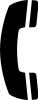

In [15]:
import cairosvg
import io

im = Image.open(io.BytesIO(cairosvg.svg2png(bytestring=svgs[4])))
im

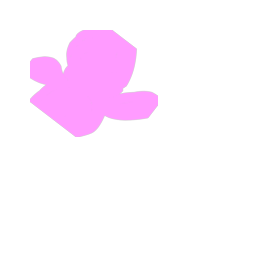

In [323]:
from imgaug import augmenters as iaa

seq = iaa.Sequential([
iaa.Fliplr(0.5),  # horizontally flip 50% of all images
        iaa.Flipud(0.1),  # vertically flip 20% of all images
        iaa.Sometimes(0.5, iaa.PerspectiveTransform(scale=(0.01, 0.1))),
        iaa.Sometimes(
            0.5, iaa.Affine(rotate=(-45, 45))  # rotate by -45 to +45 degrees
        ),
        iaa.Sometimes(0.5, iaa.PiecewiseAffine(scale=(0.01, 0.05))),
],
    random_order=True
)

image_aug = seq.augment_image(image)
image_aug.shape
# ia.imshow(image_aug)
im = Image.fromarray(image_aug[:, :, 3])
im.thumbnail((128, 128))
im.getbbox()

crop = Image.new("L", (256, 256))
crop.paste(im, (30, 30))

fill = Image.new("RGBA", (256, 256))
draw = ImageDraw.Draw(fill)
draw.rectangle((0,0,256,256), fill=(255, 0, 255, 100), outline=None)

im = Image.composite(fill, Image.new("RGBA", (256, 256)), mask=crop)
im

# crop.getbbox()

In [1]:
%autoreload 2
%cd /workspace/CRAFT-pytorch/my-src/generator

import blocks as bk

icon = bk.Icon("/workspace/CRAFT-pytorch")
im, _ = icon.sample(127)
im

# Image.open("/workspace/CRAFT-pytorch/test.png").resize((128, 64), Image.BICUBIC)
# Image.open("/workspace/CRAFT-pytorch/test.png").resize((128, 64), Image.HAMMING)

UsageError: Line magic function `%autoreload` not found.


In [243]:
x = OrderedDict([("a", 1), ("b", 2), ("c", 3)])
y = OrderedDict([("b", 3), ("a", 4)])
# for k,v in y.items():
#     OrderedDict()
# x.update(y)
# x
# OrderedDict([ for k in x])
y2 = y.copy()
y2.update(x)
y2.update(y)
y2

OrderedDict([('b', 3), ('a', 4), ('c', 3)])

In [234]:
while True:
    wh = np.clip(np.random.normal(0.4, 0.2, 2), 0.01, 1)
    cxy = np.random.uniform(0.02, 0.98, 2)
    print(wh)
    # wh = 

    wh = np.clip(wh, 0, 2-2*cxy)
    wh = np.clip(wh, 0, 2*cxy)

    xy1 = cxy - wh/2
    xy2 = cxy + wh/2
    if wh[0] == 0. or wh[1] == 0.:
        print(wh, xy1, xy2, cxy)
        break
        
# wh = np.random.normal(0.4, 0.2, 2)
# cxy = np.random.uniform(0.02, 0.98, 2)

# print(wh)
# np.clip(wh, 0, 2-2*cxy)


[0.77280145 0.15275919]
[0.68607944 0.34929061]
[0.33367762 0.13742428]
[0.67636664 0.28965209]
[0.35571417 0.33968199]
[0.23674153 0.44967075]
[0.12517108 0.46751612]
[0.48793795 0.16697093]
[0.4523569  0.31032648]
[0.52323701 0.86875904]
[0.21828052 0.63515597]
[0.49609808 0.22387679]
[0.52151646 0.74583493]
[0.19213064 0.34329429]
[0.52400717 0.44970294]
[0.32467434 0.77089086]
[0.27002946 0.34391874]
[0.39250045 0.31154128]
[0.46791182 0.14688741]
[0.23619907 0.05961821]
[0.28397841 0.05765177]
[0.4918429  0.18936844]
[0.51407849 0.38421913]
[0.62180137 0.72185123]
[0.40795129 0.58467126]
[0.77849328 0.43662386]
[0.3655603  0.52655665]
[0.25857495 0.44199012]
[0.24347434 0.44793599]
[0.49486068 0.40939755]
[0.37279159 0.56692637]
[0.7553913  0.18033885]
[0.01535679 0.3414184 ]
[0.11072406 0.494041  ]
[0.22460322 0.31238933]
[0.21251883 0.40692939]
[0.21474301 0.28783002]
[0.5311618 0.4833934]
[0.53074402 0.54086152]
[0.47920446 0.11792672]
[0.14540477 0.2526989 ]
[0.58674131 0.7789

[0.01       0.44503191]
[0.23666306 0.35269365]
[0.44069026 0.13213858]
[0.43779989 0.4588275 ]
[0.36470172 0.3481799 ]
[0.34045482 0.54101324]
[0.23465484 0.36710158]
[0.37002617 0.01      ]
[0.07685144 0.94123418]
[0.35192032 0.31199125]
[0.26405443 0.40491177]
[0.76983327 0.03777614]
[0.11910216 0.43997404]
[0.46444478 0.50424185]
[0.2889257  0.76394813]
[0.14244996 0.4036993 ]
[0.66266523 0.31125301]
[0.56964628 0.43276523]
[0.35885042 0.35119582]
[0.59475415 0.59798364]
[0.27315641 0.39843475]
[0.57570531 0.23057302]
[0.43542593 0.75968528]
[0.08590834 0.35280397]
[0.43023131 0.46619747]
[0.45617528 0.6021713 ]
[0.35123213 0.47456564]
[0.155895   0.45854207]
[0.21203614 0.80961617]
[0.27195349 0.72700472]
[0.35134559 0.48936527]
[0.31991661 0.58069147]
[0.3021744  0.24582229]
[0.25670554 0.18750302]
[0.31276546 0.5356743 ]
[0.34758415 0.48144875]
[0.01       0.21075173]
[0.66909538 0.24138285]
[0.31963819 0.41521992]
[0.38525612 0.61547585]
[0.74141975 0.75574532]
[0.69518247 0.36

[0.28757426 0.51674548]
[0.4182755  0.51372367]
[0.19374352 0.01      ]
[0.34658215 0.50265687]
[0.26534833 0.53377463]
[0.48406845 0.26794814]
[0.20258521 0.29920658]
[0.48525275 0.30290241]
[0.58387471 0.24367775]
[0.61485145 0.56807755]
[0.57766917 0.47573085]
[0.56033801 0.34018297]
[0.6930122  0.26851478]
[0.32776478 0.27841989]
[0.57979654 0.38718838]
[0.62194687 0.11381751]
[0.22852249 0.34015474]
[0.41055092 0.55479086]
[0.23557983 0.26136452]
[0.3043153  0.44678983]
[0.30954839 0.13670765]
[0.32194526 0.60522582]
[0.40071412 0.01      ]
[0.35881042 0.49729153]
[0.46440883 0.39720404]
[0.02151816 0.53128333]
[0.28309965 0.32070971]
[0.26661231 0.25930177]
[0.46384063 0.64432669]
[0.36182643 0.27527277]
[0.01       0.79783116]
[0.17363278 0.54103172]
[0.54090984 0.17465996]
[0.40946097 0.48553411]
[0.0949112  0.46043014]
[0.42378481 0.11169334]
[0.4576845  0.27505257]
[0.38430307 0.25648676]
[0.47807852 0.585155  ]
[0.82236108 0.72954969]
[0.37197612 0.36507549]
[0.20610655 0.80

[0.54336812 0.52232513]
[0.4001963  0.29148779]
[0.32869322 0.51654633]
[0.49403663 0.29862155]
[0.66496388 0.58527537]
[0.26395842 0.44702574]
[0.26884141 0.69465186]
[0.32411752 0.22721562]
[0.79434669 0.42139956]
[0.41166684 0.65249939]
[0.63201526 0.64799908]
[0.39792757 0.22947034]
[0.17917627 0.01      ]
[0.30804755 0.63650991]
[0.01       0.22044232]
[0.45308267 0.67471271]
[0.01       0.12742185]
[0.78488531 0.51541802]
[0.11692815 0.20570001]
[0.1224605  0.13263825]
[0.46037728 0.22379165]
[0.10071472 0.74409476]
[0.29246752 0.41029223]
[0.59461521 0.55786006]
[0.32796844 0.33524675]
[0.2039615  0.30528476]
[0.42366805 0.61228777]
[0.57862438 0.54057002]
[0.22790614 0.52268835]
[0.77071045 0.37861235]
[0.16832223 0.4554517 ]
[0.01     0.419274]
[0.23928295 0.07941911]
[0.23216693 0.54311435]
[0.32237016 0.35258923]
[0.3964528  0.53560998]
[0.5597599  0.15636943]
[0.32204289 0.21078551]
[0.39751205 0.28689255]
[0.48202938 0.50012177]
[0.15117659 0.20082434]
[0.12000234 0.01    

[0.54578978 0.25913014]
[0.46274318 0.40783127]
[0.38360947 0.61410419]
[0.58612366 0.44237395]
[0.50793567 0.41911272]
[0.32897544 0.67908718]
[0.08517833 0.18696143]
[0.49621494 0.50924057]
[0.28923171 0.01      ]
[0.35047379 0.24686943]
[0.49699348 0.49691531]
[0.51604549 0.48717144]
[0.68719101 0.38600061]
[0.44912805 0.25032124]
[0.13605339 0.2776897 ]
[0.2519043  0.31074868]
[0.44209011 0.67341319]
[0.79755666 0.23179861]
[0.53906911 0.49686639]
[0.27783903 0.72844903]
[0.51704967 0.36951934]
[0.25545187 0.45125946]
[0.42757212 0.20250845]
[0.85568961 0.33006925]
[0.06019878 0.50055087]
[0.63300876 0.3100197 ]
[0.16778441 0.54019465]
[0.12982546 0.78785805]
[0.60592273 0.19391118]
[0.22834    0.33987978]
[0.617138   0.23923617]
[0.58030832 0.20640264]
[0.56475959 0.65812984]
[0.24702354 0.42648943]
[0.40356628 0.67141433]
[0.1951743  0.53696337]
[0.01       0.19910255]
[0.2683555  0.64186122]
[0.56148283 0.45170743]
[0.41656914 0.58222145]
[0.01       0.70635159]
[0.27928884 0.47

[0.41862921 0.492582  ]
[0.27145059 0.3279092 ]
[0.38367658 0.17463128]
[0.33224986 0.86522768]
[0.24482363 0.59595138]
[0.13856276 0.16810983]
[0.44710366 0.2273164 ]
[0.22887976 0.57074108]
[0.17283569 0.58502178]
[0.88628279 0.44986879]
[0.40665585 0.51018709]
[0.50323964 0.81790339]
[0.59788372 0.36977908]
[0.5128859 0.0833733]
[0.42022012 0.40208011]
[0.40838024 0.17258046]
[0.39514652 0.37097407]
[0.39041043 0.54549193]
[0.2328529  0.34171717]
[0.28943697 0.39459005]
[0.41131415 0.08554936]
[0.52481432 0.45878942]
[0.01       0.31598685]
[0.13850261 0.51475331]
[0.27522925 0.57327182]
[0.47550405 0.22592728]
[0.41459404 0.66870258]
[0.67878721 0.47653537]
[0.26669064 0.47776592]
[0.32111852 0.57267803]
[0.77228855 0.75833104]
[0.3710087 0.293452 ]
[0.66084518 0.36831869]
[0.55154384 0.56646523]
[0.46774663 0.60652869]
[0.70912116 0.5693951 ]
[0.66101339 0.33522828]
[0.21406528 0.79437205]
[0.56316994 0.47803637]
[0.0948052  0.41954385]
[0.4134372  0.31333407]
[0.63114187 0.064464

[0.50316344 0.01      ]
[0.41969311 0.64939595]
[0.65696971 0.42754852]
[0.3438256  0.10122216]
[0.3181582  0.24364917]
[0.69525502 0.73414684]
[0.25635803 0.62640023]
[0.23944099 0.23849598]
[0.32830148 0.31825367]
[0.5255121  0.38630536]
[0.26510433 0.50923069]
[0.47022582 0.2574498 ]
[0.33170487 0.69734914]
[0.71188008 0.44448561]
[0.06892776 0.40772054]
[0.35838511 0.63849603]
[0.01      0.3363406]
[0.22336372 0.20471919]
[0.32107734 0.75161753]
[0.27562756 0.37729464]
[0.47092659 0.16565646]
[0.82016882 0.24741713]
[0.22886292 0.587263  ]
[0.70984769 0.63616599]
[0.31494253 0.53529072]
[0.42173003 0.53471508]
[0.45623827 0.51674379]
[0.74004672 0.37792267]
[0.10624632 0.53816635]
[0.62570448 0.01815621]
[0.46402984 0.59700158]
[0.80533771 0.37748329]
[0.58851368 0.45561043]
[0.24844073 0.42401567]
[0.30617488 0.33470901]
[0.15762079 0.2012342 ]
[0.82965185 0.38550398]
[0.55063437 0.35000064]
[0.20334729 0.40569124]
[0.67102262 0.07201805]
[0.41005933 0.23710817]
[0.74699981 0.0262

[0.27348011 0.03131992]
[0.61812223 0.35103634]
[0.47880988 0.28891549]
[0.78824849 0.24101774]
[0.26413925 0.345673  ]
[0.29854757 0.26678883]
[0.54310329 0.77351258]
[0.55802775 0.42351263]
[0.22392191 0.73635638]
[0.58821964 0.01      ]
[0.54133421 0.3034977 ]
[0.16877026 0.39560619]
[0.18092198 0.5720669 ]
[0.61070959 0.50768283]
[0.24812916 0.86163351]
[0.19870007 0.18028797]
[0.01      0.0468907]
[0.11155629 0.44836696]
[0.16022802 0.19120721]
[0.23197469 0.59996621]
[0.75976457 0.24380873]
[0.31972011 0.23763215]
[0.16494803 0.08168967]
[0.45460013 0.41513651]
[0.17521012 0.26795123]
[0.27780486 0.58341467]
[0.38531622 0.70891733]
[0.51165502 0.90606683]
[0.69407711 0.60873803]
[0.32805535 0.19379126]
[0.86312891 0.37277062]
[0.53494371 0.61168095]
[0.39838758 0.17137569]
[0.38807484 0.77332227]
[0.19117036 0.43348276]
[0.43128511 0.47404095]
[0.51759973 0.56914015]
[0.56236102 0.45315822]
[0.58575598 0.32988077]
[0.16897007 0.42234624]
[0.30804201 0.25216969]
[0.29992946 0.4072

[0.37776174 0.43616423]
[0.56732418 0.27429217]
[0.35825061 0.39156822]
[0.21917891 0.23569141]
[0.41476604 0.33853382]
[0.33616009 0.49089064]
[0.20043456 0.21667272]
[0.24449565 0.47894804]
[0.75141793 0.56628228]
[0.54950392 0.57933651]
[0.47481121 0.37379118]
[0.23498896 0.1485338 ]
[0.07137276 0.58122238]
[0.06090153 0.36311657]
[0.29092416 0.1977053 ]
[0.64095593 0.8035802 ]
[0.52152848 0.1213264 ]
[0.91501133 0.76435469]
[0.29151854 0.7163564 ]
[0.51906332 0.43199818]
[0.01910167 0.3095353 ]
[0.62946505 0.25038223]
[0.69800913 0.35191784]
[0.68554213 0.97113004]
[0.22562055 0.48021165]
[0.47723461 0.34074366]
[0.26648737 0.35134371]
[0.04772029 0.44046544]
[0.28252897 0.38728396]
[0.56951076 0.26332473]
[0.02455608 0.44025423]
[0.46492547 0.67813104]
[0.48390679 0.25077513]
[0.64295379 0.44365137]
[0.37208143 0.61988481]
[0.41284216 0.17183972]
[0.41044602 0.27907111]
[0.64354262 0.44208021]
[0.47171003 0.28587153]
[0.57348055 0.14215246]
[0.62972777 0.4545082 ]
[0.64916633 0.67

[0.50046802 0.47373601]
[0.09555667 0.01      ]
[0.28035621 0.44792439]
[0.27361894 0.46082207]
[0.72588616 0.20506395]
[0.68599395 0.36832415]
[0.22677999 0.28515582]
[0.33649539 0.06398998]
[0.22827273 0.3404292 ]
[0.42223377 0.48638597]
[0.43301678 0.21730142]
[0.70427277 0.51292487]
[0.4209129  0.10865362]
[0.62115711 0.50091398]
[0.54675847 0.50021208]
[0.1667452  0.57019137]
[0.05089236 0.70275688]
[0.54137107 0.31121613]
[0.65783796 0.17538962]
[0.04825544 0.32974351]
[0.39418175 0.31458427]
[0.01       0.31488453]
[0.66952259 0.65794797]
[0.66605468 0.67844748]
[0.54470079 0.5168451 ]
[0.29047352 0.22039644]
[0.49973392 0.39868983]
[0.23248205 0.33478772]
[0.38458021 0.87852603]
[0.43449229 0.76958447]
[0.37038874 0.49848673]
[0.15008896 0.58925765]
[0.0995664  0.59586905]
[0.01       0.35852439]
[0.19879225 0.20970998]
[0.66587165 0.41058864]
[0.02510573 0.80099135]
[0.202243  0.1318769]
[0.64840742 0.12271439]
[0.76737805 0.28635345]
[0.35631617 0.01      ]
[0.97865866 0.2978

[0.22993065 0.05895099]
[0.45006417 0.32475182]
[0.25060518 0.56400811]
[0.34251823 0.07543701]
[0.35777377 0.53638109]
[0.54072846 0.29348364]
[0.3212619  0.35272574]
[0.28704894 0.33449205]
[0.56394777 0.49906461]
[0.46726662 0.42861974]
[0.63202873 0.36607323]
[0.65000482 0.01      ]
[0.01       0.18068691]
[0.17808244 0.33120486]
[0.4329596  0.11500749]
[0.44530044 0.28182503]
[0.1820196  0.35082396]
[0.27229235 0.58509447]
[0.33419654 0.36381038]
[0.57900733 0.25234502]
[0.29546896 0.23296064]
[0.24130927 0.02589936]
[0.29021807 0.60789407]
[0.60210699 0.26640108]
[0.41850926 0.3014997 ]
[0.31681755 0.31497849]
[0.44947299 0.35144008]
[0.50440333 0.27584358]
[0.58525374 0.40779545]
[0.46986531 0.69845949]
[0.49564939 0.4043905 ]
[0.60417929 0.22287111]
[0.43482977 0.36484374]
[0.49723353 0.57711104]
[0.59732194 0.6865827 ]
[0.43070202 0.32105288]
[0.25515644 0.32772956]
[0.63976044 0.51073804]
[0.66507281 0.34411433]
[0.33972625 0.38931813]
[0.71400772 0.09849306]
[0.99162269 0.58

[0.47659314 0.73215221]
[0.55539219 0.51134823]
[0.48923615 0.1524003 ]
[0.34850336 0.53820407]
[0.70837003 0.46667615]
[0.53983169 0.8347255 ]
[0.65728974 0.62679996]
[0.16888071 0.21074023]
[0.26880063 0.11215093]
[0.14251775 0.51094618]
[0.30001531 0.5139326 ]
[0.46526919 0.4761081 ]
[0.41457495 0.50752483]
[0.72023006 0.55437367]
[0.21256526 0.67999097]
[0.39309729 0.21869284]
[0.71936797 0.51935701]
[0.4406628  0.22806392]
[0.72211801 0.54178128]
[0.62269082 0.36842202]
[0.50178729 0.57303097]
[0.22910315 0.16047878]
[0.46336778 0.31676554]
[0.33971933 0.15568383]
[0.47325798 0.18592773]
[0.40313304 0.87692977]
[0.39078802 0.38524154]
[0.45013121 0.25893657]
[0.35313085 0.40247548]
[0.5742033  0.54385496]
[0.21025384 0.30977662]
[0.90976609 0.26367477]
[0.12539887 0.50765044]
[0.41587558 0.40419677]
[0.21480799 0.23932887]
[0.22117488 0.44321469]
[0.52404886 0.14006616]
[0.47610891 0.4153634 ]
[0.339187   0.56141372]
[0.61482336 0.51581084]
[0.53163736 0.37327306]
[0.22664534 0.37

[0.53740411 0.44427391]
[0.51943267 0.5366871 ]
[0.1717313  0.16797643]
[0.01       0.63298047]
[0.17878503 0.49911415]
[0.21830849 0.25479694]
[0.23329158 0.01      ]
[0.21924627 0.47035218]
[0.57859256 0.38914189]
[0.64855594 0.46455956]
[0.52200828 0.20690534]
[0.37016906 0.79211089]
[0.59777185 0.01496115]
[0.44610938 0.72663695]
[0.25700079 0.23384506]
[0.27962028 0.25322694]
[0.75852386 0.58468925]
[0.12290467 0.20591271]
[0.3024316  0.26164856]
[0.31320153 0.21238952]
[0.6709958 1.       ]
[0.60367169 0.60025827]
[0.46567209 0.18173016]
[0.29115573 0.48947238]
[0.30002459 0.4913869 ]
[0.24131104 0.63426062]
[0.21700152 0.29590917]
[0.52594817 0.32077459]
[0.99069799 0.82856602]
[0.20232409 0.41929181]
[0.55184584 0.19358756]
[0.59028937 0.32427191]
[0.09609782 0.3725953 ]
[0.48010732 0.30241202]
[0.20489227 0.33471496]
[0.66308867 0.46410507]
[0.87594058 0.6811504 ]
[0.40944706 0.55909896]
[0.29153223 0.24847372]
[0.42392555 0.36357787]
[0.36875433 0.36424342]
[0.50545985 0.4151

[0.19068943 0.32323947]
[0.17461609 0.56002585]
[0.61200986 0.60288578]
[0.1544023 0.1838923]
[0.66245512 0.05538172]
[0.58418227 0.91553832]
[0.40652317 0.35760149]
[0.36102883 0.46608698]
[0.20024207 0.37308667]
[0.54897191 0.49597476]
[0.07820738 0.26341793]
[0.61905847 0.37340214]
[0.86047562 0.18923959]
[0.01      0.2900206]
[0.36242138 0.57876475]
[0.32454056 0.5498123 ]
[0.3156413  0.37451252]
[0.52958131 0.32269654]
[0.04329439 0.01      ]
[0.37082069 0.95873851]
[0.41662278 0.8242101 ]
[0.41543805 0.41143052]
[0.26898736 0.45459856]
[0.53384535 0.01      ]
[0.6572094  0.41350735]
[0.48664869 0.6930387 ]
[0.37595095 0.85146658]
[0.12204657 0.35887763]
[0.57122891 0.01      ]
[0.33370233 0.47589429]
[0.42869361 0.5006419 ]
[0.28808395 0.30424646]
[0.51486635 0.3560246 ]
[0.29655803 0.43673812]
[0.52905094 0.57965635]
[0.34898206 0.53405821]
[0.55234506 0.29799938]
[0.41048256 0.10196561]
[0.69117382 0.40714763]
[0.53838664 0.79651772]
[0.55744684 0.36664563]
[0.50072653 0.287744

[0.46419329 0.50888827]
[0.21488113 0.52168438]
[0.61249854 0.36753559]
[0.36328939 0.42025552]
[0.26930184 0.5397862 ]
[0.21968501 0.19220507]
[0.42962374 0.51270608]
[0.43141438 0.56098312]
[0.27652477 0.24470959]
[0.06662256 0.36636674]
[0.29582437 0.34459101]
[0.45082988 0.62027842]
[0.30055942 0.44717238]
[0.37075513 0.48494018]
[0.37137385 0.56162274]
[0.32007047 0.94218617]
[0.31402705 0.45979906]
[0.41950482 0.65141401]
[0.24878857 0.46815264]
[0.26574441 0.13481502]
[0.39981865 0.14640113]
[0.4661662  0.40966615]
[0.65062549 0.16792272]
[0.34259507 0.93018359]
[0.20130697 0.07785629]
[0.65813523 0.36549565]
[0.65222518 0.25514241]
[0.5871063  0.60999856]
[0.38812595 0.34913486]
[0.6366858  0.68751189]
[0.55632263 0.4492159 ]
[0.79445636 0.61770445]
[0.30000443 0.21445839]
[0.45242389 0.41108621]
[0.45918899 0.52278653]
[0.48778051 0.01      ]
[0.54185999 0.67527574]
[0.52689986 0.36280275]
[0.20436339 0.58379381]
[0.06616921 0.17063688]
[0.33237749 0.30522425]
[0.47252837 0.41

[0.47501198 0.20111473]
[0.48760426 0.31650379]
[0.20651178 0.83170025]
[0.61437637 0.36493789]
[0.60642011 0.29878522]
[0.51903193 0.50252946]
[0.1586716  0.36459082]
[0.43277474 0.43718003]
[0.64721912 0.2237789 ]
[0.41449152 0.53568157]
[0.62952477 0.52282011]
[0.0830491 0.2607674]
[0.65242749 0.33827774]
[0.41793637 0.50152796]
[0.45982364 0.46244073]
[0.23692247 0.16436616]
[0.40817156 0.58367999]
[0.66191985 0.04631092]
[0.30462497 0.41885897]
[0.64216772 0.4513783 ]
[0.64761354 0.01      ]
[0.52932555 0.29781973]
[0.45257182 0.46202466]
[0.42437026 0.18257343]
[0.10339612 0.49959957]
[0.78816955 0.7265924 ]
[0.33717357 0.39492755]
[0.05974422 0.50417178]
[0.17601555 0.47169132]
[0.50404806 0.36684956]
[0.47666574 0.40586406]
[0.22734502 0.31234455]
[0.18095573 0.21313369]
[0.50550069 0.01      ]
[0.42708404 0.73862514]
[0.35483899 0.54713495]
[0.47072271 0.41249549]
[0.69953223 0.27751451]
[0.40183907 0.01      ]
[0.11782491 0.35127611]
[0.2475372  0.29858939]
[0.46615047 0.4239

[0.01       0.45038191]
[0.59541643 0.10081601]
[0.26768679 0.61472569]
[0.20022812 0.73857571]
[0.3976516  0.64131945]
[0.43358581 0.12150598]
[0.01       0.69026877]
[0.39222479 0.01      ]
[0.61685244 0.60695661]
[0.38706093 0.27689371]
[0.78516357 0.0544007 ]
[0.50237307 0.25616273]
[0.15238441 0.3275699 ]
[0.53834424 0.64033989]
[0.45319982 0.57337782]
[0.28798285 0.57741341]
[0.17329048 0.43666869]
[0.33644736 0.57566026]
[0.66701625 0.93015977]
[0.16970675 0.42024871]
[0.32871228 0.49182995]
[0.11518188 0.69594375]
[0.57358379 0.28095392]
[0.43546942 0.84904136]
[0.71002419 0.1263438 ]
[0.48751911 0.42985408]
[0.29861603 0.12552858]
[0.06557323 0.37574248]
[0.64440306 0.68418911]
[0.2179825  0.09082678]
[0.54002006 0.39494841]
[0.30927632 0.36991797]
[0.69803371 0.38854679]
[0.1199947  0.25500556]
[0.19975249 0.24217385]
[0.58690046 0.35273472]
[0.45146047 0.17020491]
[0.45236907 0.37332649]
[0.22957351 0.29130574]
[0.41871963 0.62555066]
[0.45695161 0.85817945]
[0.17749014 0.20

[0.16704947 0.7186273 ]
[0.28236024 0.49049265]
[0.30164681 0.48292967]
[0.39926227 0.22576195]
[0.30731405 0.33865581]
[0.01      0.5201866]
[0.38012489 0.29938425]
[0.06383066 0.26266702]
[0.46819776 0.49775893]
[0.59797458 0.64121976]
[0.39473488 0.43287334]
[0.17184204 0.44575363]
[0.77759051 0.50352077]
[0.53180029 0.26686703]
[0.43066707 0.0554511 ]
[0.36706256 0.36548554]
[0.49127028 0.50928361]
[0.55151079 0.34078667]
[0.73655141 0.45591807]
[0.51644864 0.58522352]
[0.41817486 0.23048347]
[0.30343374 0.34889972]
[0.22100361 0.34563118]
[0.50279422 0.23962774]
[0.01       0.57348734]
[0.36418304 0.35641538]
[0.32074815 0.36033611]
[0.44109007 0.29292342]
[0.04669349 0.38833783]
[0.36032838 0.20232012]
[0.61690349 0.06661037]
[0.10213796 0.38745776]
[0.29229614 0.62925992]
[0.42285132 0.64449167]
[0.08443281 0.30411905]
[0.46046205 0.29532226]
[0.65595781 0.1205478 ]
[0.58447193 0.46531671]
[0.01       0.62694675]
[0.45663292 0.02424899]
[0.45544235 0.76491345]
[0.67339935 0.01  

[0.40717585 0.37377627]
[0.42310837 0.43678176]
[0.04135575 0.41538607]
[0.21371459 0.43440096]
[0.47193035 0.79719788]
[0.427597   0.55434221]
[0.3687937  0.40358573]
[0.30955477 0.48959843]
[0.68251687 0.12885803]
[0.6026859  0.14991676]
[0.17924241 0.22262108]
[0.55425749 0.20348972]
[0.44214223 0.92296825]
[0.19461029 0.37107592]
[0.24284214 0.48749138]
[0.20761294 0.46051941]
[0.4519535  0.46287538]
[0.09564693 0.3773906 ]
[0.117964   0.59964205]
[0.61130859 0.50440265]
[0.18883589 0.46148248]
[0.21517852 0.45574428]
[0.41153349 0.01      ]
[0.38988204 0.61074464]
[0.48670969 0.61339163]
[0.50216498 0.24575311]
[0.41497943 0.60244074]
[0.61692546 0.74211476]
[0.25450038 0.22140803]
[0.58011739 0.62145014]
[0.30771082 0.32394887]
[0.29793244 0.48483659]
[0.19901279 0.25227653]
[0.62980242 0.29653747]
[0.54580718 0.59816067]
[0.31340093 0.01      ]
[0.79024181 0.48490528]
[0.56249219 0.99183082]
[0.42623794 0.43832185]
[0.16814343 0.45666205]
[0.49792441 0.01      ]
[0.41100771 0.01

[0.53911577 0.2773393 ]
[0.46912498 0.47890244]
[0.20011757 0.40158522]
[0.5668443  0.08770096]
[0.29728138 0.41134951]
[0.5720134  0.31539269]
[0.33464256 0.53987606]
[0.37379493 0.7219159 ]
[0.28327337 0.68061212]
[0.56601899 0.51614206]
[0.78842236 0.28974938]
[0.31740627 0.14627934]
[0.34938245 0.37052857]
[0.63676946 0.51773063]
[0.4680279 0.5176406]
[0.60611557 0.23727677]
[0.64846809 0.57482043]
[0.71656382 0.28028164]
[0.24461077 0.43956525]
[0.07433557 0.8431539 ]
[0.31875642 0.54665237]
[0.29921221 0.09461798]
[0.47639651 0.43903876]
[0.17528835 0.71021336]
[0.597007   0.42692263]
[0.58482242 0.54623262]
[0.26374843 0.25676387]
[0.64010191 0.24573738]
[0.86982193 0.1642529 ]
[0.18339704 0.62077323]
[0.05850845 0.49547523]
[0.6234511  0.56833178]
[0.61973142 0.29865319]
[0.68810043 0.40038686]
[0.52913636 0.20331178]
[0.3894176  0.57363743]
[0.51277983 0.5448974 ]
[0.27470234 0.60604273]
[0.53843832 0.69036901]
[0.96930613 0.70659338]
[0.4551826  0.18201776]
[0.94038397 0.3453

KeyboardInterrupt: 

In [341]:
%autoreload 2
%cd /workspace/CRAFT-pytorch/my-src

from data import ParamDataset
from generator.blocks import CLASSES

ds = ParamDataset("/workspace/CRAFT-pytorch/my-dataset/train.json", cats=CLASSES)
# _, _, cat, pre_cat, p, _ = ds[1]
# _, _, _, _, _, cats = ds[1]
# cats
dl = torch.utils.data.DataLoader(ds, batch_size=2, shuffle=True)
for x in dl:
    print(x)
    break



/workspace/CRAFT-pytorch/my-src
[tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],

         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],

         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],

         [[-1., -1., -1.,  ..., -1., -1., -1.],
    

In [12]:
a = (1,2,3)
a.index(3)

2

110 110
100 100


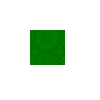

In [176]:
imsize = 100

rect = Image.new("RGBA", (imsize, imsize))
draw = ImageDraw.Draw(rect)
draw.rectangle((30, 30, 64, 64), fill=(0, 122, 0, 255))

p = Image.open("/workspace/transparent-textures/patterns/arab-tile.png").convert("RGBA")
# p = p.convert("RGBA")

print(p.width, p.height)
p.thumbnail((imsize, imsize))
print(p.width, p.height)


# print(np.array(p))
alpha = Image.alpha_composite(rect, p)

im = Image.new("RGBA", (imsize, imsize))
im.paste(alpha, mask=rect.split()[-1])
im
# alpha
# rect
# Image.composite(rect, p, mask=rect)

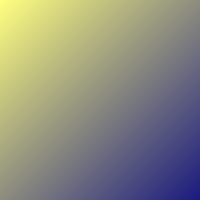

In [270]:
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 200, 200)
cr = cairo.Context(surface)
cr.scale(200, 200)
pat = cairo.LinearGradient(0, 0, 1, 1)
pat.add_color_stop_rgba(0, 0.5, 1, 1, 1)
pat.add_color_stop_rgba(1, 0.5, 0.1, 0.1, 1)
cr.rectangle(0, 0, 1, 1)
cr.set_source(pat)
cr.fill()
data = np.ndarray(
    shape=(200, 200, 4), dtype=np.uint8, buffer=surface.get_data()
)
im = Image.fromarray(data)
im

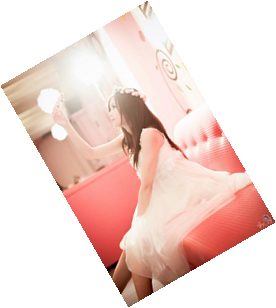

In [37]:
im = Image.open("/workspace/CoordConv-pytorch/data/facebook/60122_528371913855789_1929735771_n.jpg").convert("RGBA")
im.thumbnail((256, 256))
# im.filter(ImageFilter.MedianFilter(5))
im.rotate(30, resample=Image.BICUBIC, expand=True)

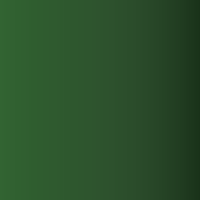

In [196]:
import cairo

surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 200, 200)
cr = cairo.Context(surface)
cr.scale(200, 200)

# pat = cairo.LinearGradient(0, 0, 0, 1)
pat = cairo.LinearGradient(0, 0, 1, 0)

# for rgb in np.random.uniform(0, 1, (2, 4)):
#     pat.add_color_stop_rgba(*rgb, 1)

pat.add_color_stop_rgba(0, 1, 1, 1, 0)
pat.add_color_stop_rgba(1, 0, 0, 0, 0.5)
cr.rectangle(0, 0, 1, 1)
cr.set_source(pat)
cr.fill()

data = np.ndarray(
    shape=(200, 200, 4), dtype=np.uint8, buffer=surface.get_data()
)
grad = Image.fromarray(data)


im = Image.new("RGBA", (200, 200))
draw = ImageDraw.Draw(im)
draw.rectangle((0, 0, 200, 200), fill=(50, 100, 50, 256))
# im.alpha_composite(grad)

# Image.alpha_composite(im, grad)
im.alpha_composite(grad)
im

/workspace/CRAFT-pytorch/my-src/generator
[<PIL.Image.Image image mode=L size=256x256 at 0x7F863942FAC8>, <PIL.Image.Image image mode=L size=256x256 at 0x7F863941E828>, <PIL.Image.Image image mode=L size=256x256 at 0x7F863942F9B0>, <PIL.Image.Image image mode=L size=256x256 at 0x7F863942F9E8>, <PIL.Image.Image image mode=L size=256x256 at 0x7F863942FB00>] [2, 1, 3, 3, 3] []


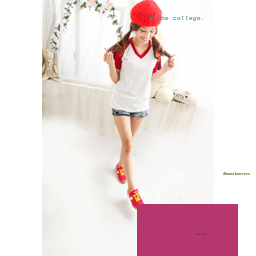

In [53]:
%autoreload 2
%cd /workspace/CRAFT-pytorch/my-src/generator

# from generator.mask import create_mask
import random
from main import Sampler
import blocks as bk

opt = SimpleNamespace()
opt.imsize = 256

# p = {"_a": np.array([1.0]), "_wh": np.array([1.0, 1.0]), "_cxy": np.array([0.5, 0.5]), "repeat": True}
p = {"_a": np.array([1.0]), "_wh": np.array([1.0, 1.0]), "_cxy": np.array([0.5, 0.5])}
bg = bk.Choice([bk.Rectangle(p), bk.Photo("/workspace/CoordConv-pytorch/data/facebook", p)])
text = bk.Choice([
    bk.Line(),
    bk.Group([bk.Line(), bk.Line()]),
    bk.Group([bk.Line(), bk.Line(), bk.Line()]),
])
dec = bk.Rectangle()

# g = bk.Group([bk.Line()])
# cm = bk.CropMask(bk.Line(), bk.Photo("/workspace/CoordConv-pytorch/data/facebook"))
# cm = bk.CropMask(bk.Line(), bk.Rectangle())

texture = bk.Photo("/workspace/transparent-textures/patterns", p)
cm = bk.CropMask(texture, bk.Rectangle({"_a": np.array([1])}))
# cm2 = bk.CropMask(bk.Line(), cm)


s = Sampler([bg, dec,text], opt)
im, (mask_t, cat_t, params_t) = s.sample()

print(mask_t, cat_t, params_t)
im
# mask_t[0]

[[[ 0  0  0  0]
  [ 0  0  0 26]
  [ 8  0  0 33]
  ...
  [ 8  0  0 33]
  [ 8  0  0 32]
  [ 0  0  0  5]]

 [[ 0  0  0 11]
  [ 8  0  0 33]
  [ 8  0  0 33]
  ...
  [ 8  0  0 33]
  [ 8  0  0 33]
  [ 8  0  0 33]]

 [[ 8  0  0  0]
  [ 0  0  0 27]
  [ 8  0  0 33]
  ...
  [ 8  0  0 33]
  [ 7  0  0 34]
  [ 0  0  0 14]]

 ...

 [[ 0  0  0  2]
  [ 0  0  0  0]
  [ 0  0  0  0]
  ...
  [ 0  0  0  0]
  [ 0  0  0  0]
  [ 0  0  0  3]]

 [[ 0  0  0  3]
  [ 0  0  0  0]
  [ 0  0  0  0]
  ...
  [ 0  0  0  0]
  [ 0  0  0  3]
  [ 0  0  0  2]]

 [[ 0  0  0  3]
  [ 0  0  0  0]
  [ 0  0  0  8]
  ...
  [ 0  0  0  0]
  [ 0  0  0  0]
  [ 0  0  0  3]]]


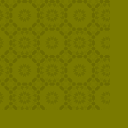

In [181]:
imsize = 128
im = Image.new("RGBA", (imsize, imsize))

# mask = Image.new("RGBA", (imsize, imsize))
draw = ImageDraw.Draw(im)
draw.rectangle((0, 0, imsize, imsize), fill=(122, 122, 0, 255))

p = Image.open("/workspace/transparent-textures/patterns/arab-tile.png")
p = p.convert("RGBA")
p.thumbnail((128, 128))

# print(np.array(p))

im.alpha_composite(p)

# Image.composite(p, im, mask)
# np.array(x)
im

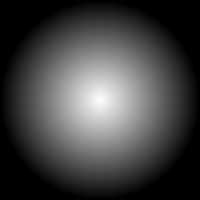

In [226]:
from math import pi

from io import BytesIO
import cairo
import IPython.display

pattern = cairo.MeshPattern()
pattern.begin_patch()
pattern.move_to(0, 0)
pattern.curve_to(30/200, -30/200, 60/200, 30/200, 100/200, 0)
pattern.curve_to(60/200, 30/200, 130/200, 60/200, 100/200, 100/200)
pattern.curve_to(60/200, 70/200, 30/200, 130/200, 0, 100/200)
pattern.curve_to(30/200, 70/200, -30/200, 30/200, 0, 0)
pattern.set_corner_color_rgb(0, 1, 0, 0)
pattern.set_corner_color_rgb(1, 0, 1, 0)
pattern.set_corner_color_rgb(2, 0, 0, 1)
pattern.set_corner_color_rgb(3, 1, 1, 0)
pattern.end_patch()

# svgio = BytesIO()
# with cairo.SVGSurface(svgio, 200, 200) as surface:

surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 200, 200)
cr = cairo.Context(surface)
cr.scale(200, 200)

# pat = cairo.LinearGradient(0.0, 0.0, 0.0, 1.0)
# for p in np.random.uniform(0, 1, (5, 4)):
#     pat.add_color_stop_rgba(*tuple(p), 1)

pat = cairo.RadialGradient(0.5, 0.5, 0., 0.5, 0.5, 0.5)
# pat.add_color_stop_rgba(0, 0.4, 0.8, 0, 1)
# pat.add_color_stop_rgba(1, 0.4, 0.9, 0.5, 1)
pat.add_color_stop_rgba(0, 1, 1, 1, 1)
pat.add_color_stop_rgba(1, 0, 0, 0, 1)


cr.set_source(pat)
cr.rectangle(0, 0, 1, 1)
cr.fill()
    
#     pat.add_color_stop_rgba(0, 1, 1, 1, 1)
#     pat.add_color_stop_rgba(1, 0, 0, 0, 1)
# cr.set_line_width(0.04)
# pat = cairo.RadialGradient(0.45, 0.4, 0.1,
#                                0.4, 0.4, 0.5)
# pat.add_color_stop_rgba(0, 1, 1, 1, 1)
# pat.add_color_stop_rgba(1, 0, 0, 0, 1)
# cr.set_source(pat)
# cr.arc(0.5, 0.5, 0.3, 0, 1 * pi)
# cr.fill()


# IPython.display.SVG(data=svgio.getvalue())


# width, height = 255, 255
# surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, width, height)
data = np.ndarray(shape=(200, 200, 4),
                     dtype=np.uint8,
                     buffer=surface.get_data())
# data.shape

im = Image.fromarray(data)
im
# data



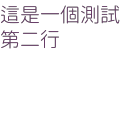

In [189]:
imsize = 128
font = ImageFont.truetype("/workspace/post-generator/asset/fonts_cn/GenJyuuGothic/GenJyuuGothic-Light.ttf", 20, encoding='unic')
im = Image.new("RGBA", (imsize, imsize))
draw = ImageDraw.Draw(im)
draw.text((0,0), "這是一個測試\n第二行", (100, 50, 100), font)
im

In [5]:
%autoreload 2
%cd /workspace/CRAFT-pytorch/my-src
import glob
# from data import MyDataset
from algo.kmeans import lloyd
from model.vgg import VGGFeatures

opt = SimpleNamespace()
opt.imsize = 64
opt.n_samples = 100
opt.n_layers = 3
opt.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
opt.root = "../tmp"

model = VGGFeatures().to(opt.device)
model.eval()
trans = transforms.Compose(
    [
        transforms.Resize((opt.imsize, opt.imsize)),
        transforms.ToTensor(),
    ]
)

feats = []
for f in glob.glob(opt.root + "/*"):
    x = trans(Image.open(f))
    x = x.unsqueeze(0)
    x = model(x)
    print(x.shape)
    feats.append(x)
feats = torch.cat(feats, dim=0).detach().numpy()
feats.shape

# idx, ctr = lloyd(feats, 2, opt.device)


# d = MyDataset(opt)
# im, cur_masks, target_mask = d[2]
# # im.shape

# trans(im)
# # trans(target_mask)
# # target_mask.shape


/workspace/CRAFT-pytorch/my-src
torch.Size([1, 2048])
torch.Size([1, 2048])
torch.Size([1, 2048])
torch.Size([1, 2048])
torch.Size([1, 2048])


(5, 2048)

In [6]:
idx, ctr = lloyd(feats, 2, opt.device)

In [10]:
idx
# ctr.shape

array([1, 0, 0, 1, 1])

In [22]:
%autoreload 2
%cd /workspace/CRAFT-pytorch/my-src
from models.craft import CRAFT, vgg16_bn

model = CRAFT()
# x = torch.randn(1, 3, 768, 768)
# m = vgg16_bn(True, False)

/workspace/CRAFT-pytorch/my-src


In [26]:
# m = models.vgg16_bn(pretrained=False).features
# m[0]
x = torch.randn(1, 6, 64, 64)
y = model(x)
# y[0].shape
# summary(m, input_size=(3, 64, 64))

# for i in range(5):
#     print(y[i].shape)
    
y[0].shape

torch.Size([1, 32, 32, 2])

In [ ]:
%autoreload 2
%cd /workspace/CRAFT-pytorch/my-src
from generator import blocks as bk

class Sampler:
    def __init__(self, blocks, opt):
        self.blocks = blocks
        self.imsize = opt.imsize

    def sample(self):
        im = Image.new("RGBA", (self.imsize, self.imsize))
        anns = dict()
        labels = []
        for bk in self.blocks:
            bk.sample(self.imsize)
            im.alpha_composite(bk.im)
            for k, v in bk.annotations:
                anns.setdefault(k, []).append(v)
            labels.append(bk.label)
        return im, anns, labels

opt = SimpleNamespace()
opt.imsize = 256

rect = bk.Rectangle()
jpg = bk.Photo("/workspace/CoordConv-pytorch/data/facebook")
text = bk.Text()
bg = bk.Background([bk.Rectangle(), bk.Photo("/workspace/CoordConv-pytorch/data/facebook")])

sp = Sampler([bg, jpg, rect, text], opt)
im, anns, labels = sp.sample()

labels
draw = ImageDraw.Draw(im)
for l in labels:
    draw.rectangle(l['box'], fill=None, outline=(0, 0, 0, 255), width=2)
im

In [ ]:
##### from PIL import Image, ImageDraw
import tesserocr
from tesserocr import PyTessBaseAPI, RIL

im = Image.open('tmp/fb8a7b30bcb8ace3e88565e7617fc87c.jpg')
draw = ImageDraw.Draw(im)
# draw.rectangle((500, 500, 600, 550), fill=255)

print(tesserocr.tesseract_version()) 
print(tesserocr.get_languages())

with PyTessBaseAPI() as api:
    api.SetImage(im)
#     boxes = api.GetComponentImages(RIL.TEXTLINE, True)
    boxes = api.GetComponentImages(RIL.BLOCK, True)
    print('Found {} textline image components.'.format(len(boxes)))
    for i, (_im, box, _, _) in enumerate(boxes):
#         # im is a PIL image object
#         # box is a dict with x, y, w and h keys
        api.SetRectangle(box['x'], box['y'], box['w'], box['h'])
        ocrResult = api.GetUTF8Text()
        conf = api.MeanTextConf()
        print(conf, ocrResult)
        draw.rectangle((box['x'], box['y'], box['x']+box['w'], box['y']+box['h']), fill=None, outline=(255, 0, 0))
#         print("Box[{0}]: x={x}, y={y}, w={w}, h={h}, confidence: {1}, text: {2}").format(i, conf, ocrResult, **box)
im

In [ ]:
net = CRAFT()  # initialize
state_dict = torch.load("craft_mlt_25k.pth", map_location="cpu")

new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k.replace("module.", "")  # remove 'module.' of dataparallel
    new_state_dict[name] = v

net.load_state_dict(new_state_dict)
net.eval()
None

In [ ]:
image = imgproc.loadImage("data/0e2f315f1f068638932de997005ff9a6.jpg")
img_resized, target_ratio, size_heatmap = imgproc.resize_aspect_ratio(
        image,
        1280,
        interpolation=cv2.INTER_LINEAR,
        mag_ratio=1.5,
    )
ratio_h = ratio_w = 1 / target_ratio

# preprocessing
x = imgproc.normalizeMeanVariance(img_resized)
x = torch.from_numpy(x).permute(2, 0, 1)  # [h, w, c] to [c, h, w]
x = Variable(x.unsqueeze(0))  # [c, h, w] to [b, c, h, w]

# forward pass
y, _ = net(x)

# make score and link map
# score_text = y[0, :, :, 0].cpu().data.numpy()
# score_link = y[0, :, :, 1].cpu().data.numpy()

# render results (optional)
# render_img = score_text.copy()
# render_img = np.hstack((render_img, score_link))
# ret_score_text = imgproc.cvt2HeatmapImg(render_img)

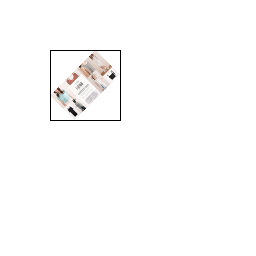

In [52]:
im = Image.new("RGBA", (256, 256))
p = Image.open("/workspace/CRAFT-pytorch/data/0a7c18c4c6c89108254a07b8a4cc1641.jpg").convert('RGBA')
p.thumbnail((64, 64))
p = p.rotate(45, expand=True)

im.paste(p, (50, 50))

# im.bbox
# im

draw = ImageDraw.Draw(im)
draw.rectangle(im.getbbox(), fill=None, outline=(0, 0, 0, 255))
# im.getbbox()
im